In [1]:
from my_cluster import myCluster
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
X = iris.data

In [3]:
model = myCluster(X, 3, 1)

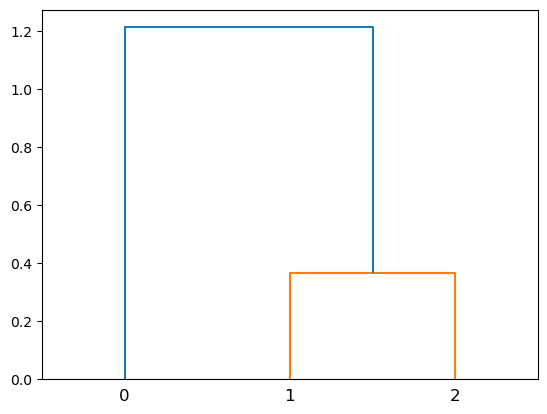

In [4]:
model.plot_dendrogram()

In [5]:
model.agg_eigenvectors()

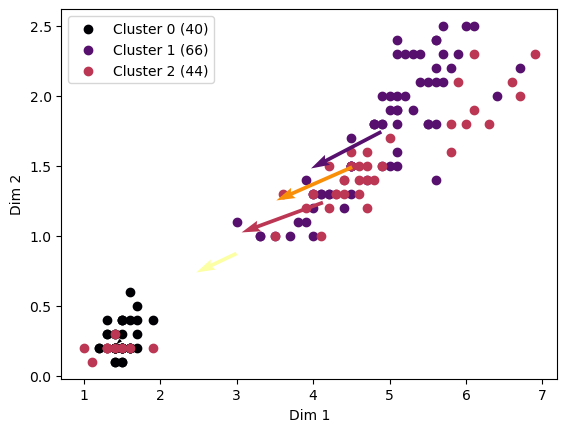

In [11]:
model.plot_2d_scatter(2, 3)